##### Michaelis\-Menten

Modelo reduzido

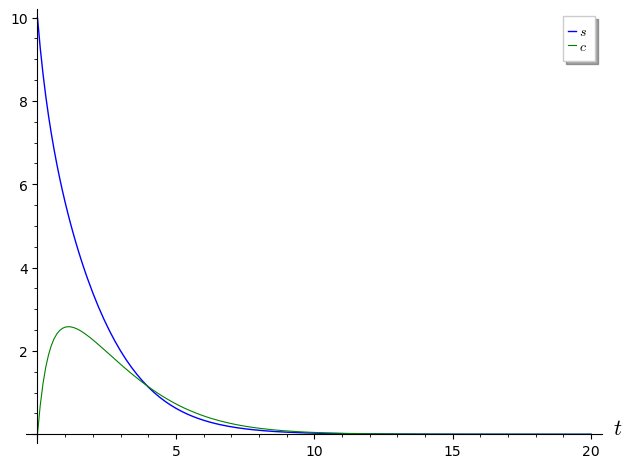

In [22]:
s0, R1,R2,t,s,c,p,k1,k2,k3 = var('s0 R1 R2 t s c p k1 k2 k3')
[k1,k2,k3] = [.1,1,.1]; R1=8 ; s0 = 10

mm_r1 =  k3*c-k1*s*R1+k1*s*c
mm_r2 =  k1*s*R1-k1*s*c - k3*c - k2*c

resm  = desolve_system_rk4([mm_r1,mm_r2],[s,c], ics=[0,s0,0],ivar=t,step=.1, end_points=20)

pm0 = list_plot([ [i,j] for i,j,k in resm], plotjoined=True, legend_label='$s$')
pm1 = list_plot([ [i,k] for i,j,k in resm], plotjoined=True, color='green', legend_label='$c$',  thickness=.8, axes_labels=['$t$',''])

pm0+pm1

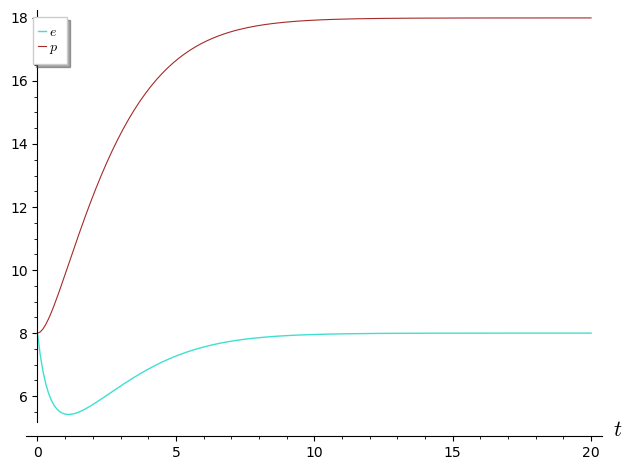

In [28]:
pm2 = list_plot([ [i,R1 - k] for i,j,k in resm], plotjoined=True, legend_label='$e$',color='turquoise')
pm3 = list_plot([ [i,R1 + s0 - k - j] for i,j,k in resm], plotjoined=True, color='brown', legend_label='$p$',  thickness=.8, axes_labels=['$t$',''])

pm2+pm3

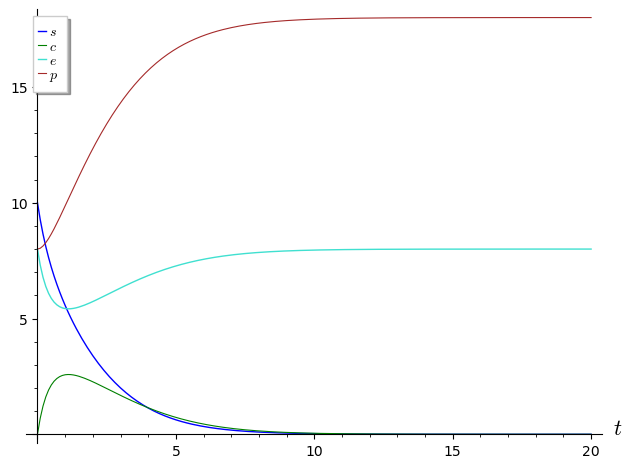

In [29]:
pm0+pm1+pm2+pm3

In [3]:
solve([mm_r1,mm_r2], [s,c])

[[s == 0, c == 0]]

In [7]:
J = jacobian([mm_r1,mm_r2],[s,c]); A=J(s=0,c=0)
show(J, A )


[ 0.100000000000000*c - 0.800000000000000  0.100000000000000*s + 0.100000000000000]
[-0.100000000000000*c + 0.800000000000000  -0.100000000000000*s - 1.10000000000000] [-0.800000000000000  0.100000000000000]
[ 0.800000000000000  -1.10000000000000]

In [11]:
show(" tr=  ", A.trace()," det=  ",  A.det())

' tr=  ' -1.90000000000000 ' det=  ' 0.800000000000000

In [12]:
delta=(A.trace())**2-4*(A.det())
delta

0.410000000000000

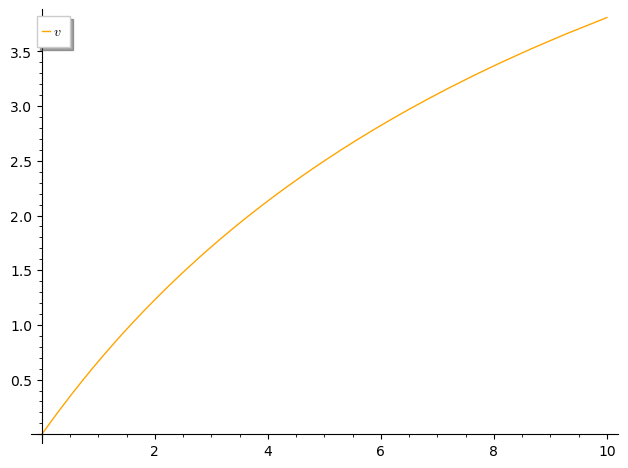

In [23]:
vm = R1*k2; km=(k3+k2)/k1
list_plot([ (j,vm*j/(j+km)) for i,j,k in resm], plotjoined=True, legend_label='$v$',color='orange')

In [16]:
vm

8